# Problem Statement 

1. The energy sector is undergoing a radical transformation, with the transition to renewable energy sources and the need to balance supply and demand in real-time becoming increasingly important <br><br>

2. The main challenges facing the power grid are the integration of bidirectional energy flows, the management of non-dispatchable generation, and the deployment of a digital telecommunications infrastructure that allows control and automation

- In the context of this project, the problem statement can be defined as:<br><br>

- "How can we develop a model that accurately forecasts hourly energy consumption and generation in Spain, balancing supply and demand in real-time, using the provided dataset of electrical consumption, generation, pricing, and weather data for Spain?"<br><br>

3. The objective is to create a model that can handle the changing demand for electricity and the use of different energy sources in today's fast-changing world, ensuring a reliable and efficient energy supply.<br><br>

4. This model will be used to optimize the energy infrastructure and maintain a high level of reliability in the power grid

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Data Collection and Understanding

In [3]:
# Import the datasets
dfw = pd.read_csv("weather_features.csv")
dfe = pd.read_csv("energy_dataset.csv")

In [4]:
# ELECTRICITY DATA
dfe.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
dfe.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

**Data Understanding - Short Explanation of Columns:**

1. **Time (Datetime Index Localized to CET):**
   - Represents the temporal aspect of the dataset, with a datetime index localized to Central European Time (CET).<br><br>

2. **Fossil Generation:**
   - Biomass: Biomass generation in MW.
   - Brown Coal/Lignite: Coal/lignite generation in MW.
   - Coal-Derived Gas: Coal gas generation in MW.
   - Fossil Gas: Gas generation in MW.
   - Fossil Hard Coal: Hard coal generation in MW.
   - Fossil Oil: Oil generation in MW.
   - Fossil Oil Shale: Shale oil generation in MW.
   - Fossil Peat: Peat generation in MW.<br><br>

3. **Hydro Generation:**
   - Pumped Storage Aggregated: Hydro1 generation in MW.
   - Pumped Storage Consumption: Hydro2 generation in MW.
   - Run-of-River and Poundage: Hydro3 generation in MW.
   - Water Reservoir: Hydro4 generation in MW.<br><br>

4. **Renewable Generation:**
   - Geothermal: Geothermal generation in MW.
   - Marine: Sea generation in MW.
   - Solar: Solar generation in MW.
   - Waste: Waste generation in MW.
   - Wind Offshore: Wind offshore generation in MW.
   - Wind Onshore: Wind onshore generation in MW.<br><br>
   
   
5. **Forecast Solar Day Ahead:**
    - Reflects the forecasted solar generation, providing an estimate of solar electricity generation for the next day.<br><br>

6. **Forecast Wind Offshore Eday Ahead:**
    - Represents the forecasted offshore wind generation, offering an estimate of offshore wind electricity generation for the next day.<br><br>

7. **Forecast Wind Onshore Day Ahead:**
    - Indicates the forecasted onshore wind generation, offering an estimate of onshore wind electricity generation for the next day.<br><br>

8. **Total Load Forecast:**
    - Reflects the forecasted electrical demand, providing an estimate of the total electricity demand for a specific period.<br><br>

9. **Total Load Actual:**
    - Quantifies the actual electrical demand, indicating the real-time total electricity demand for a specific period.<br><br>

10. **Price Day Ahead:**
    - Represents the forecasted electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.<br><br>

11. **Price Actual:**
    - Indicates the actual electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.<br><br>

These columns collectively provide a comprehensive snapshot of Spain's electrical generation, consumption, pricing, and renewable energy forecast data, allowing for in-depth analysis and forecasting.


In [6]:
# WEATHER DATA
dfw.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [7]:
dfw.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

**Data Understanding - Short Explanation of Columns:**

1. **DateTime and Location:**
   - `dt_iso`: Datetime index localized to CET.
   - `city_name`: Name of the city.

2. **Temperature and Pressure:**
   - `temp`: Temperature in Kelvin.
   - `temp_min`: Minimum temperature in Kelvin.
   - `temp_max`: Maximum temperature in Kelvin.
   - `pressure`: Atmospheric pressure in hPa.

3. **Humidity and Wind:**
   - `humidity`: Humidity in percentage.
   - `wind_speed`: Wind speed in m/s.
   - `wind_deg`: Wind direction.

4. **Precipitation and Snow:**
   - `rain_1h`: Rain in the last hour in mm.
   - `rain_3h`: Rain in the last 3 hours in mm.
   - `snow_3h`: Snow in the last 3 hours in mm.

5. **Cloud Cover and Weather Description:**
   - `clouds_all`: Cloud cover in percentage.
   - `weather_id`: Code used to describe weather.
   - `weather_main`: Short description of current weather.
   - `weather_description`: Long description of current weather.
   - `weather_icon`: Weather icon code for the website.

These columns collectively provide comprehensive weather-related information, including temperature, pressure, humidity, wind speed, precipitation, cloud cover, and weather descriptions, facilitating detailed analysis and forecasting.


In [8]:
# shape of the electricity data
dfe.shape

(35064, 29)

In [9]:
# shape of the weather data
dfw.shape

(178396, 17)

# Data Exploration and Preparation

In [10]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [11]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [12]:
dfe.head(2)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.1,64.92


In [13]:
dfw.head(2)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [14]:
# converting the date&time columns into it's correct datetime format

dfw['dt_iso'] = pd.to_datetime(dfw['dt_iso'], errors='coerce', utc=True)
dfe['time'] = pd.to_datetime(dfe['time'], errors='coerce', utc=True)

In [15]:
# 'time' and 'dt_iso' are the common columns
merged_df = pd.merge(dfe, dfw, left_on='time', right_on='dt_iso', how='inner')

In [16]:
merged_df.head(3)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [17]:
# If the common column is no longer needed, you can drop it
merged_df = merged_df.drop(['dt_iso'], axis=1)

In [18]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [19]:
merged_df.shape

(178396, 45)

In [20]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         178396 non-null  datetime64[ns, UTC]
 1   generation biomass                           178301 non-null  float64            
 2   generation fossil brown coal/lignite         178306 non-null  float64            
 3   generation fossil coal-derived gas           178306 non-null  float64            
 4   generation fossil gas                        178306 non-null  float64            
 5   generation fossil hard coal                  178306 non-null  float64            
 6   generation fossil oil                        178301 non-null  float64            
 7   generation fossil oil shale                  178306 non-null  float64            
 8   generation fos

In [22]:
duplicate_count = merged_df.duplicated(subset=['time']).sum()

# Print the count of duplicates
print("Number of duplicates based on time column:", duplicate_count)

Number of duplicates based on time column: 143332


In [23]:
merged_df = merged_df.drop_duplicates(subset=['time'])

In [24]:
duplicate_count = merged_df.duplicated(subset=['time']).sum()

# Print the count of duplicates
print("Number of duplicates based on time column:", duplicate_count)

Number of duplicates based on time column: 0


In [25]:
duplicate_count = merged_df.duplicated().sum()
print("Total duplicate rows:", duplicate_count)

Total duplicate rows: 0


In [26]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
10,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
15,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
20,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [27]:
merged_df.shape

(35064, 45)

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 178391
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat        

In [29]:
merged_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023,290.783954,290.225644,291.357900,1015.979381,65.093971,2.692477,160.801648,0.034458,0.000227,0.000154,20.740475,782.171800
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083,7.234569,7.090499,7.523438,11.937650,19.678281,2.582959,120.412607,0.263594,0.003535,0.011912,25.604016,76.809176
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500,285.150000,285.150000,285.650000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000,290.190000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,20.000000,801.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,100.000000,804.000000


In [30]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [31]:
# select spedified columns in the dataframe for analysis
new_columns =['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil','generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage','generation hydro water reservoir','generation nuclear', 
        'generation other', 'generation other renewable','generation solar', 'generation waste','generation wind onshore',
        'total load actual','price actual','temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed','clouds_all',
        'weather_main']

In [32]:
merged_new = merged_df.loc[:,new_columns]

In [33]:
merged_new.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [34]:
merged_new.shape

(35064, 24)

In [35]:
merged_new.rename(columns={"generation wind onshore": "generation wind"}, inplace=True)

In [36]:
# checking for null values
merged_new.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind                                18
total load actual                              36
price actual                                    0
temp_min                                        0
temp_max                                        0
pressure                                        0


In [37]:
# Remove rows with null values from the DataFrame
merged_new = merged_new.dropna()

In [38]:
# Check if there are any null values in the DataFrame
null_check = merged_new.isnull().values.any()

# Print True if there are null values, False if there are no null values
print(null_check)

False


In [39]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35018 entries, 0 to 178391
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35018 non-null  datetime64[ns, UTC]
 1   generation biomass                           35018 non-null  float64            
 2   generation fossil brown coal/lignite         35018 non-null  float64            
 3   generation fossil gas                        35018 non-null  float64            
 4   generation fossil hard coal                  35018 non-null  float64            
 5   generation fossil oil                        35018 non-null  float64            
 6   generation hydro pumped storage consumption  35018 non-null  float64            
 7   generation hydro run-of-river and poundage   35018 non-null  float64            
 8   generation hydro water reservo

In [40]:
merged_new.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268,290.232235,291.364570,1015.986179,65.096665,2.692387,20.747159
std,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082,7.089812,7.522657,11.939170,19.677740,2.583226,25.602385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000,285.150000,285.659000,1012.000000,51.000000,1.000000,0.000000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [41]:
merged_new.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

In [42]:
# Extract date and hour components
merged_new['date'] = merged_new['time'].dt.date
merged_new['hour'] = merged_new['time'].dt.hour
# Extract month, week, and day
merged_new['month'] = merged_new['time'].dt.month
merged_new['week'] = merged_new['time'].dt.isocalendar().week  # ISO week number
merged_new['day'] = merged_new['time'].dt.day
merged_new['year'] = merged_new['time'].dt.year

In [43]:
merged_new = merged_new.drop(columns=['time'])

In [44]:
merged_new.head(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,date,hour,month,week,day,year
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,2014-12-31,23,12,1,31,2014
5,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,2015-01-01,0,1,1,1,2015


In [45]:
# Reordering the columns
merged_new = merged_new[['date','year','month','week','day','hour'] 
                        + [col for col in merged_new.columns if col not in 
                           ['date','year','month','week','day','hour']]]

In [46]:
merged_new.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


# EXPLORATORY DATA ANALYSIS

In [47]:
# Create a copy of the original DataFrame
df_eda = merged_new.copy()

# check the first few rows of the copied DataFrame
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [48]:
df_eda.describe()

,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35018.000000,35018.000000,35018.0,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,2016.500942,6.525815,26.675081,15.736393,11.499714,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268,290.232235,291.364570,1015.986179,65.096665,2.692387,20.747159
std,1.117513,3.447927,15.060199,8.797409,6.923293,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082,7.089812,7.522657,11.939170,19.677740,2.583226,25.602385
min,2014.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,2016.000000,4.000000,14.0,8.000000,5.000000,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000,285.150000,285.659000,1012.000000,51.000000,1.000000,0.000000
50%,2017.000000,7.000000,27.0,16.000000,11.000000,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,2018.000000,10.000000,40.0,23.000000,17.750000,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,2018.000000,12.000000,53.0,31.000000,23.000000,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [49]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

In [50]:
# Assuming df_eda is your DataFrame
unique_weather_categories = df_eda['weather_main'].unique()

print("Unique Weather Categories are : ",unique_weather_categories)

Unique Weather Categories are :  ['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze']


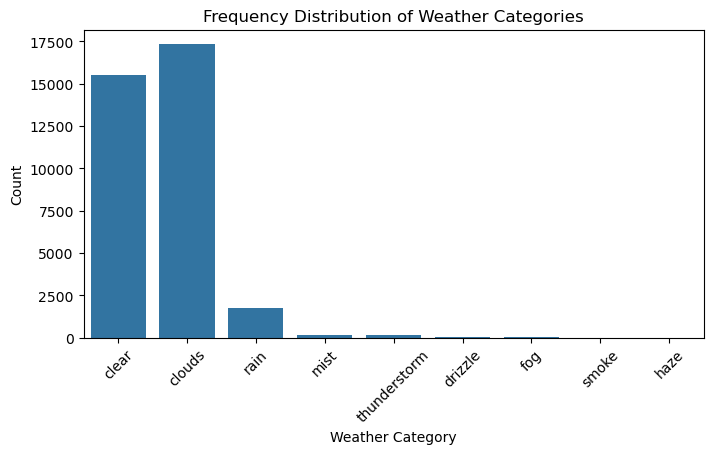

In [53]:
plt.figure(figsize=(8, 4))
sns.countplot(x='weather_main', data=df_eda)
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [54]:
df_eda['weather_main'] = df_eda['weather_main'].replace({
    'mist': 'clouds',
    'thunderstorm': 'rain',
    'drizzle': 'rain',
    'fog': 'clouds',
    'smoke': 'clear',
    'haze': 'clouds'
})

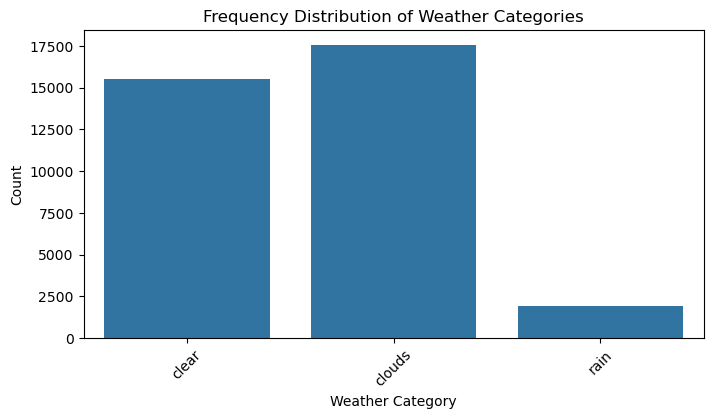

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(x='weather_main', data=df_eda)
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

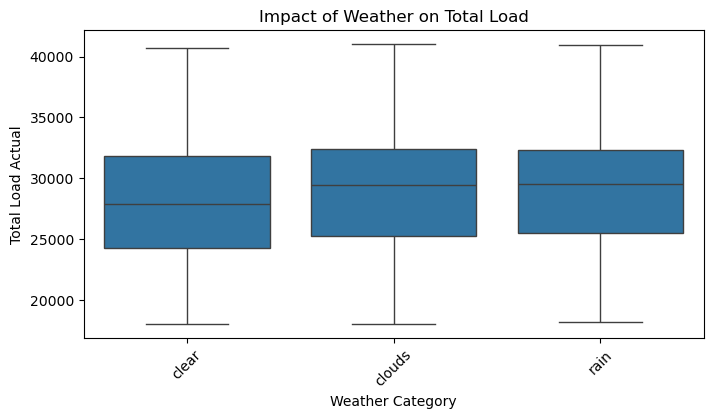

In [59]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='weather_main', y='total load actual', data=df_eda)
plt.title('Impact of Weather on Total Load')
plt.xlabel('Weather Category')
plt.ylabel('Total Load Actual')
plt.xticks(rotation=45)
plt.show()

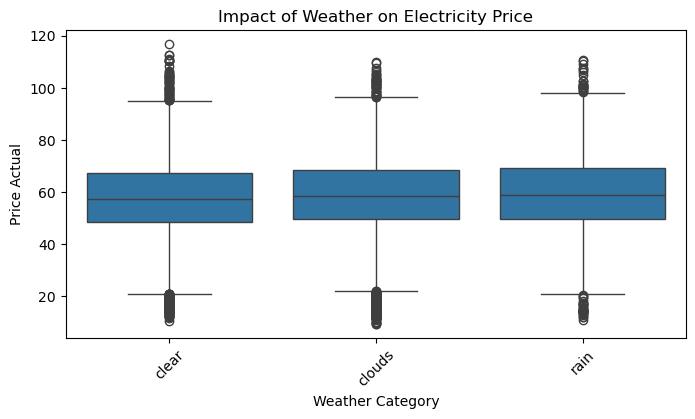

In [60]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='weather_main', y='price actual', data=df_eda)
plt.title('Impact of Weather on Electricity Price')
plt.xlabel('Weather Category')
plt.ylabel('Price Actual')
plt.xticks(rotation=45)
plt.show()

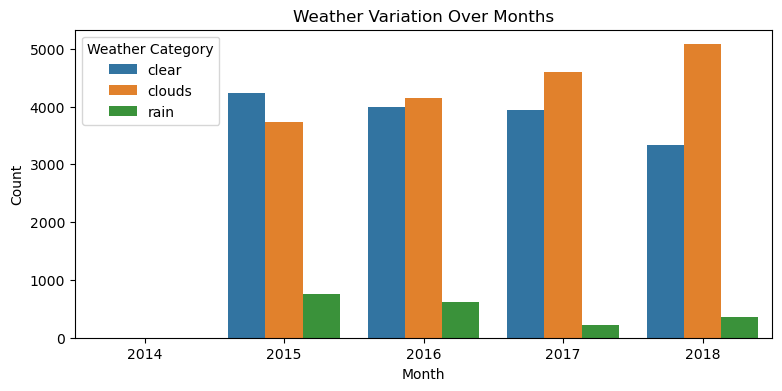

In [62]:
plt.figure(figsize=(9, 4))
sns.countplot(x='year', hue='weather_main', data=df_eda)
plt.title('Weather Variation Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Weather Category')
plt.show()

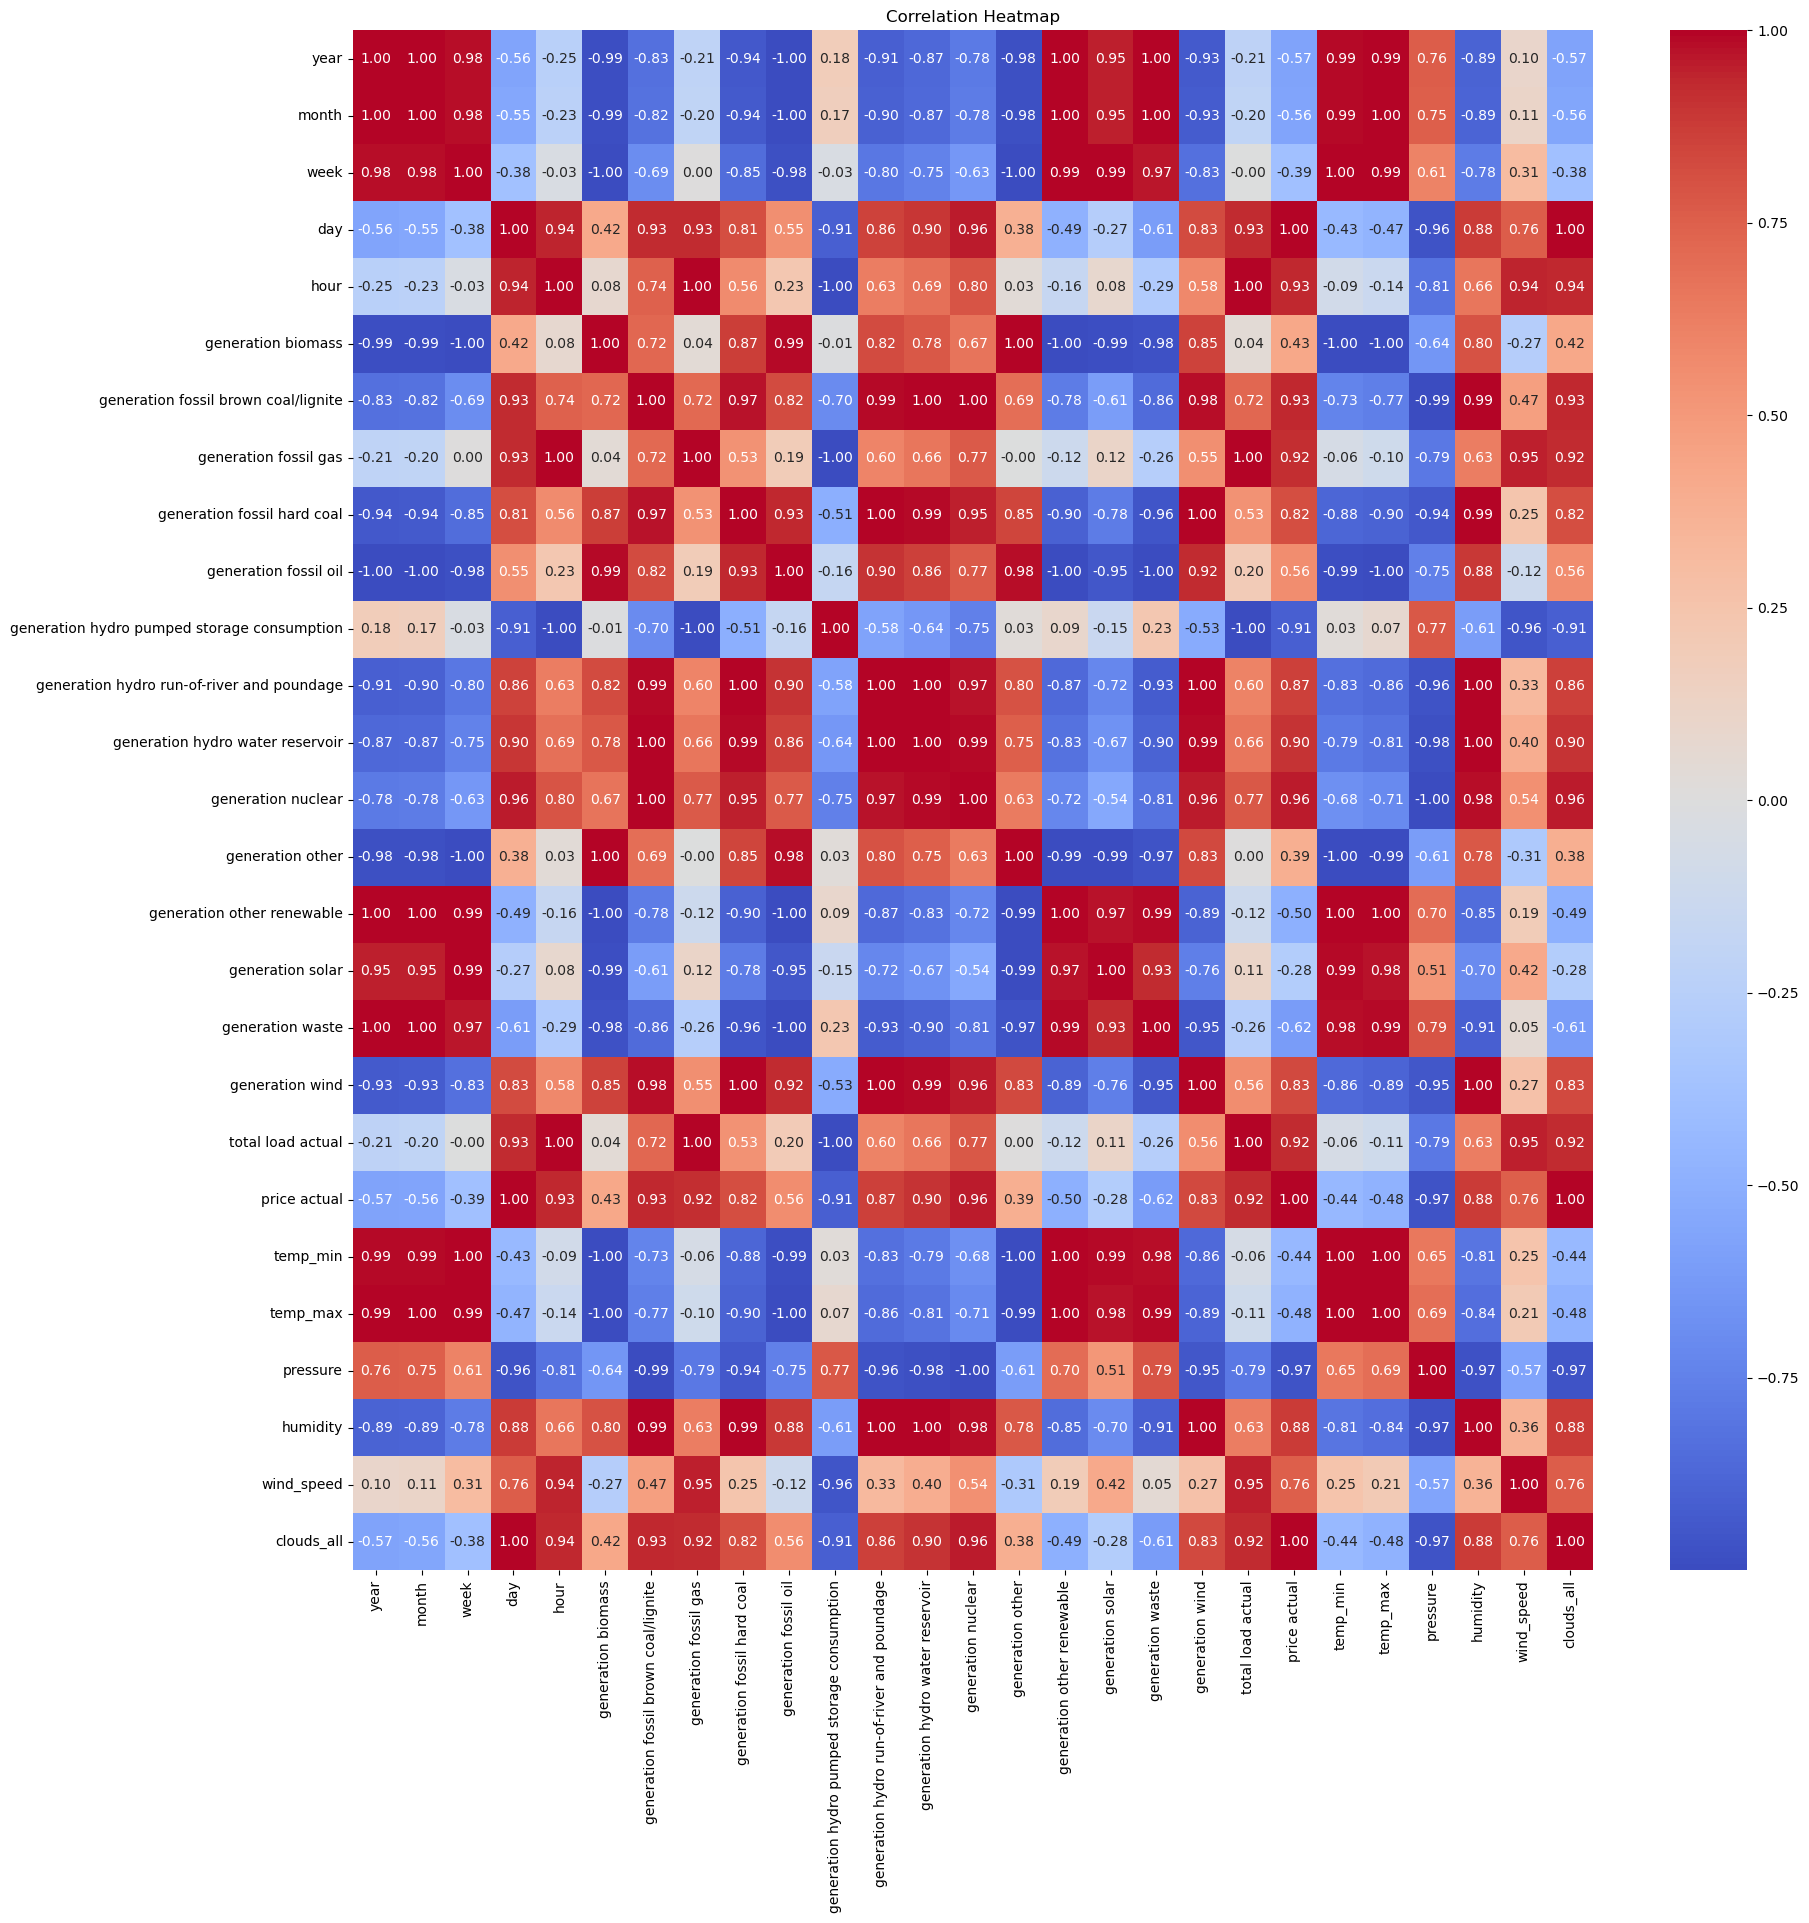

In [63]:
weather_corr = df_eda.groupby('weather_main').mean(numeric_only=True).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

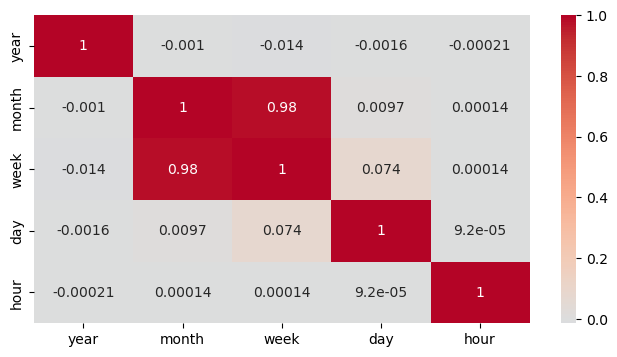

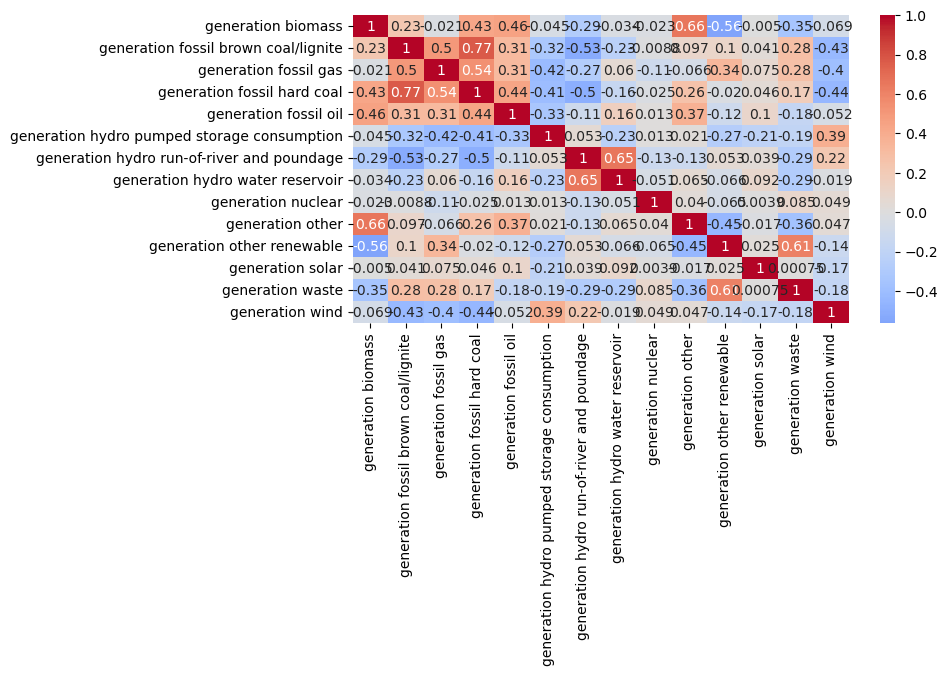

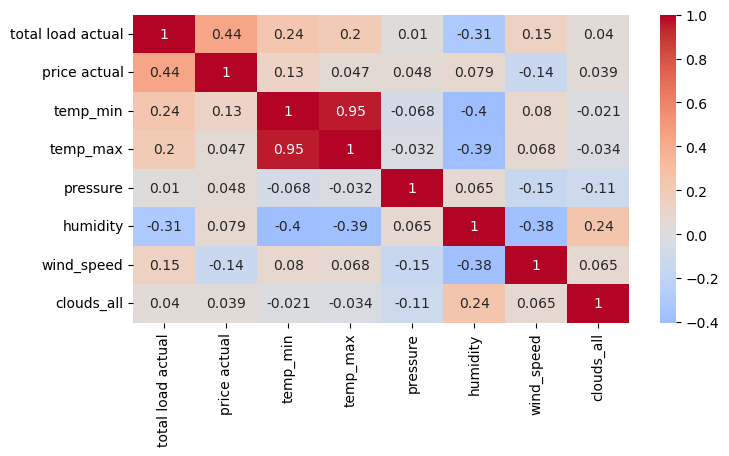

In [65]:
# List of groups based on variables
groups = [['year', 'month', 'week', 'day', 'hour'],
          ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
           'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption',
           'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
           'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind'],
          ['total load actual', 'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']]

# Plot heatmap for each group
for group in groups:
    plt.figure(figsize=(8, 4))
    sns.heatmap(df_eda[group].corr(), annot=True, cmap='coolwarm', center=0)
    plt.show()

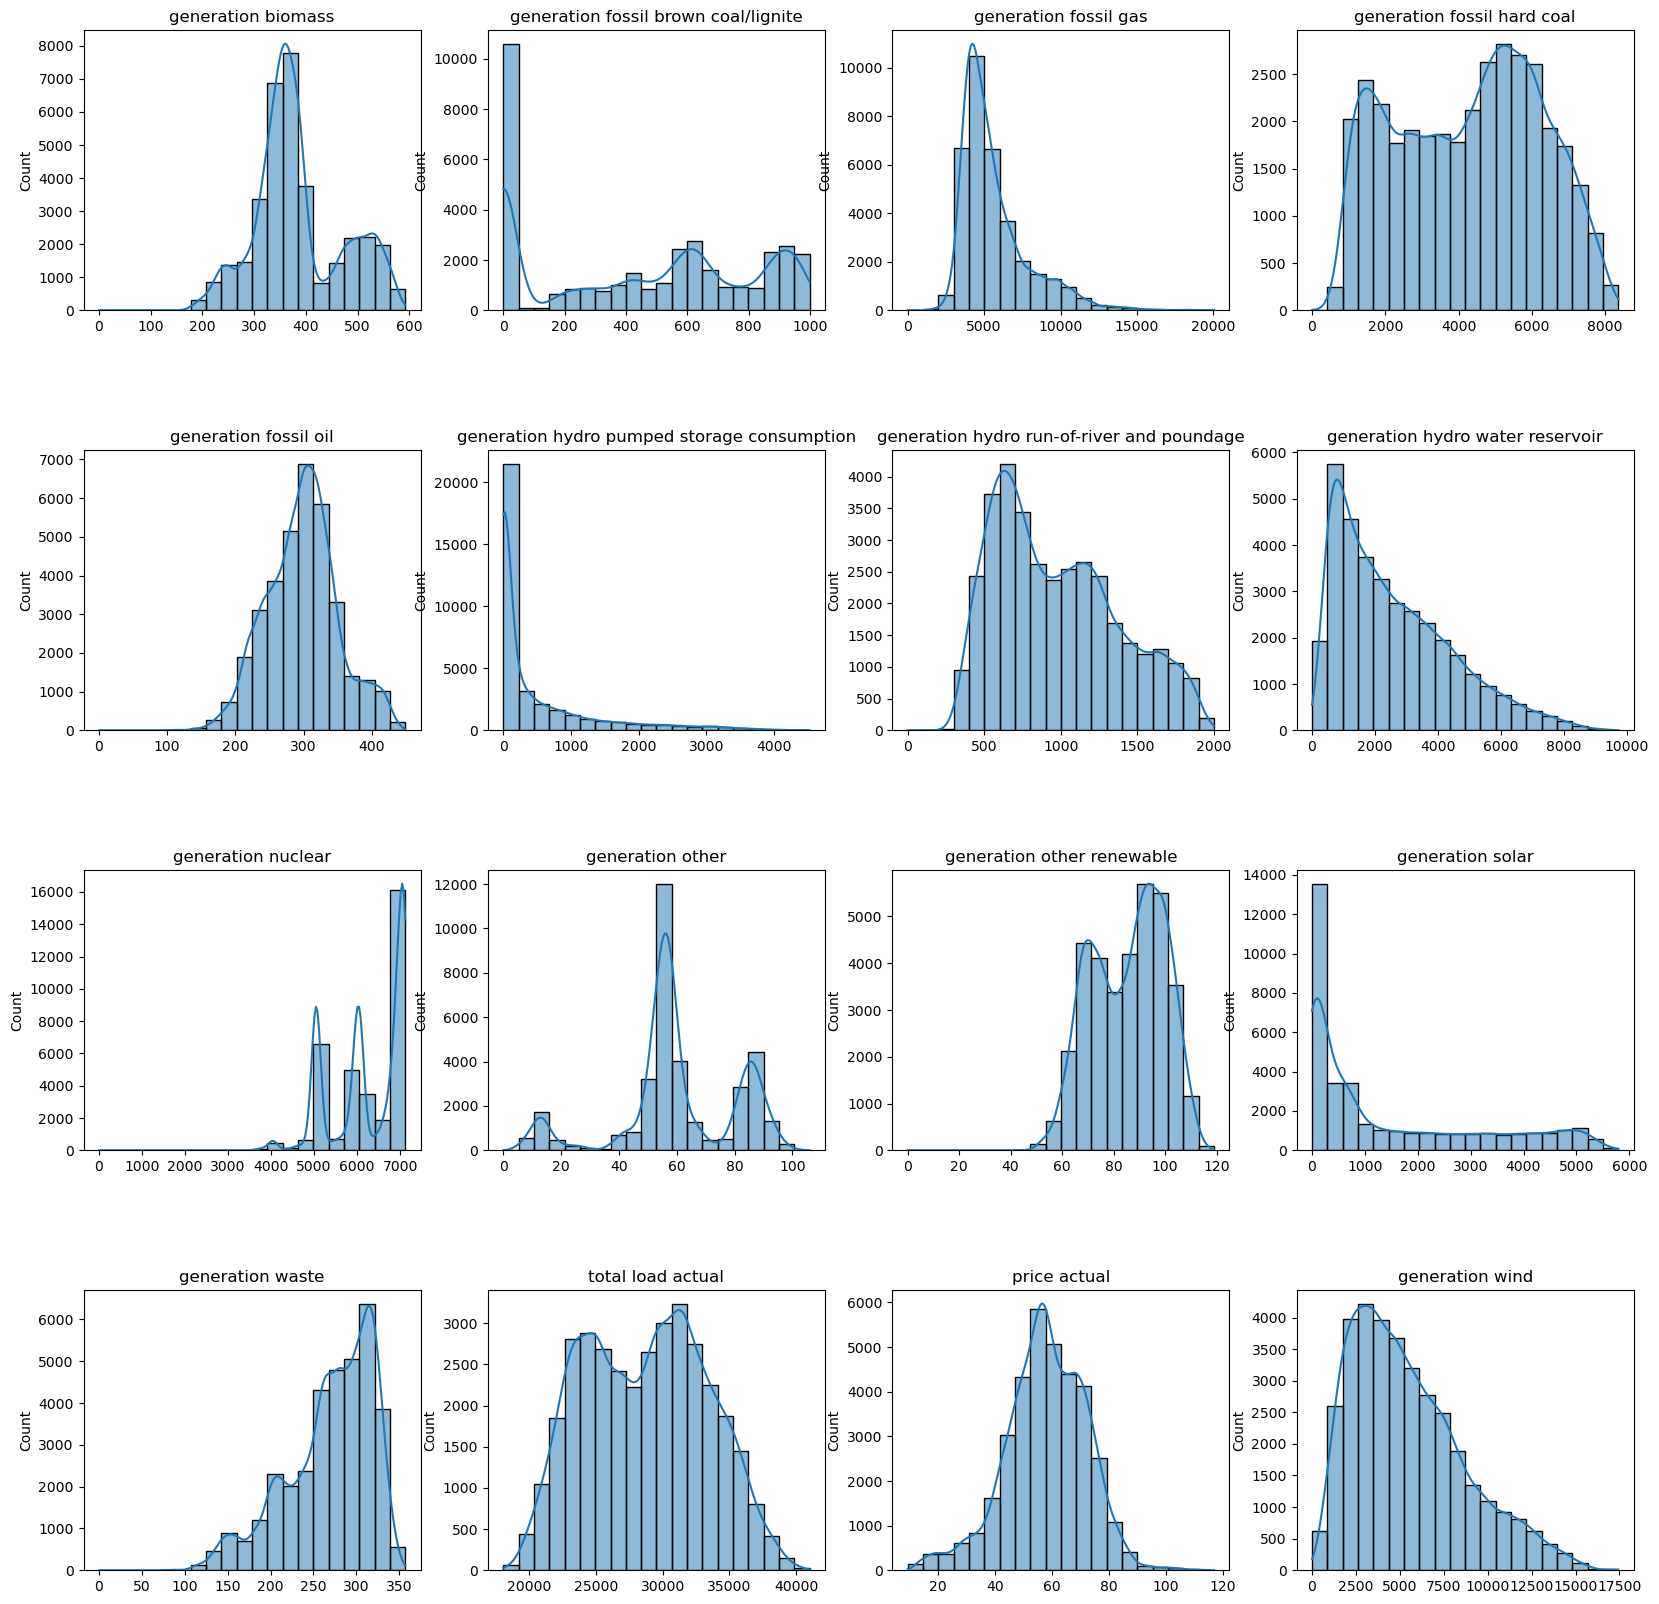

In [66]:
# Selecting columns for the subplot
selected_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual', 'generation wind']

# Set the number of columns and rows for the subplot
num_cols = 4
num_rows = (len(selected_columns) - 1) // num_cols + 1

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array to handle the case when there's only one row or column
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(df_eda[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(None)

# Hide any empty subplots if the number of selected columns is not a multiple of num_cols
for j in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

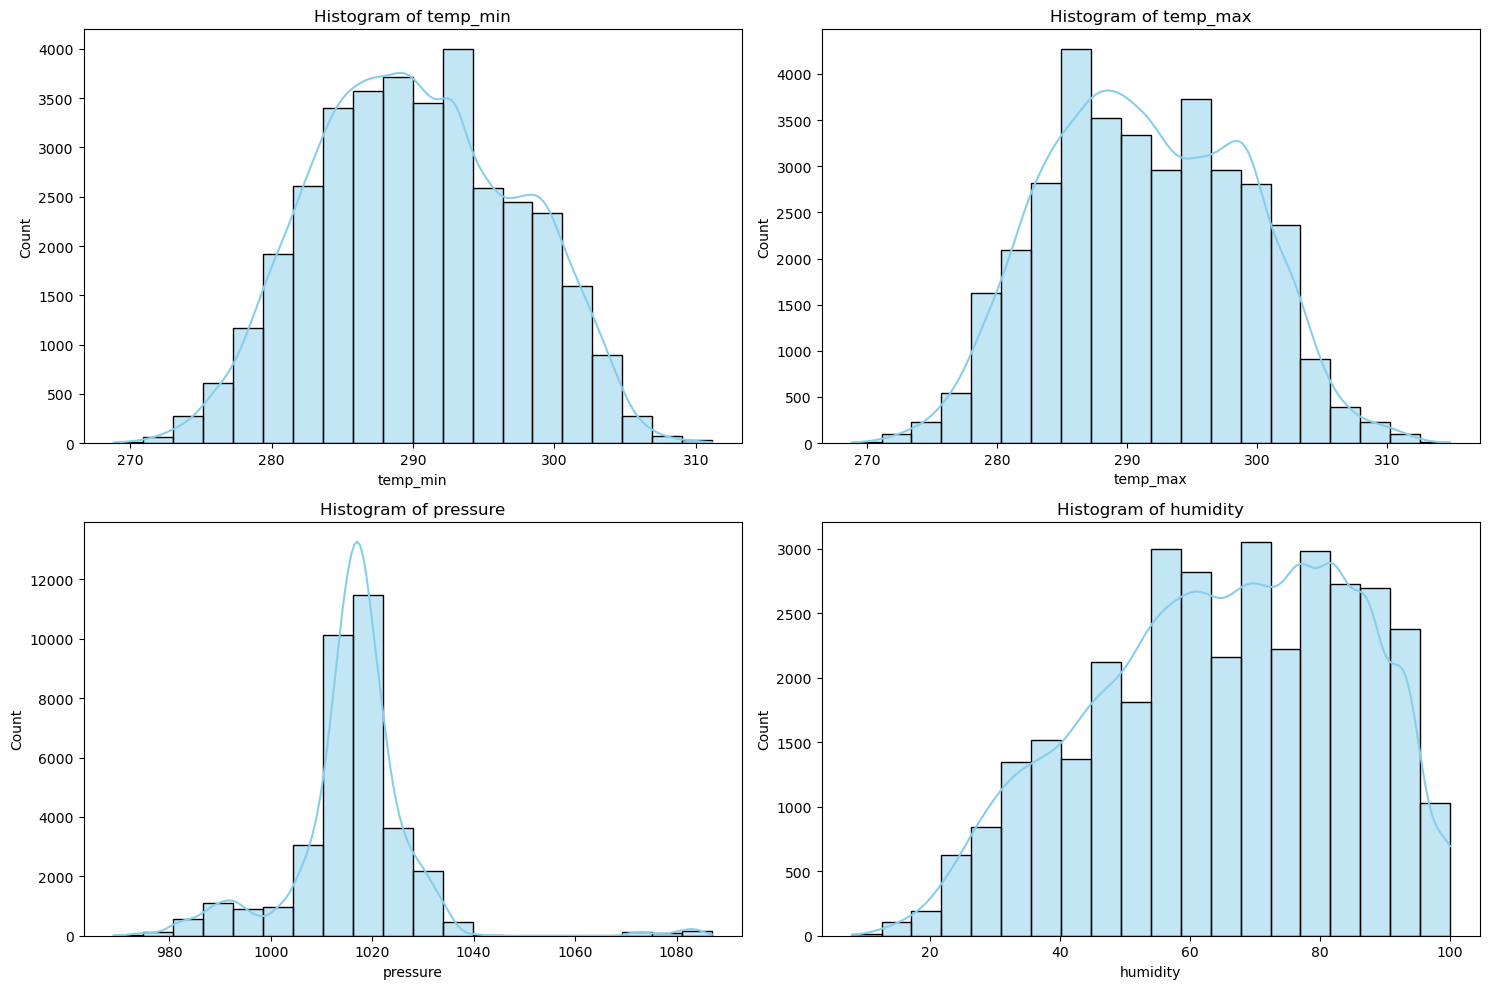

In [67]:
weather_columns = ['temp_min', 'temp_max', 'pressure', 'humidity']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each weather variable and create histograms
for i, column in enumerate(weather_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_eda[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

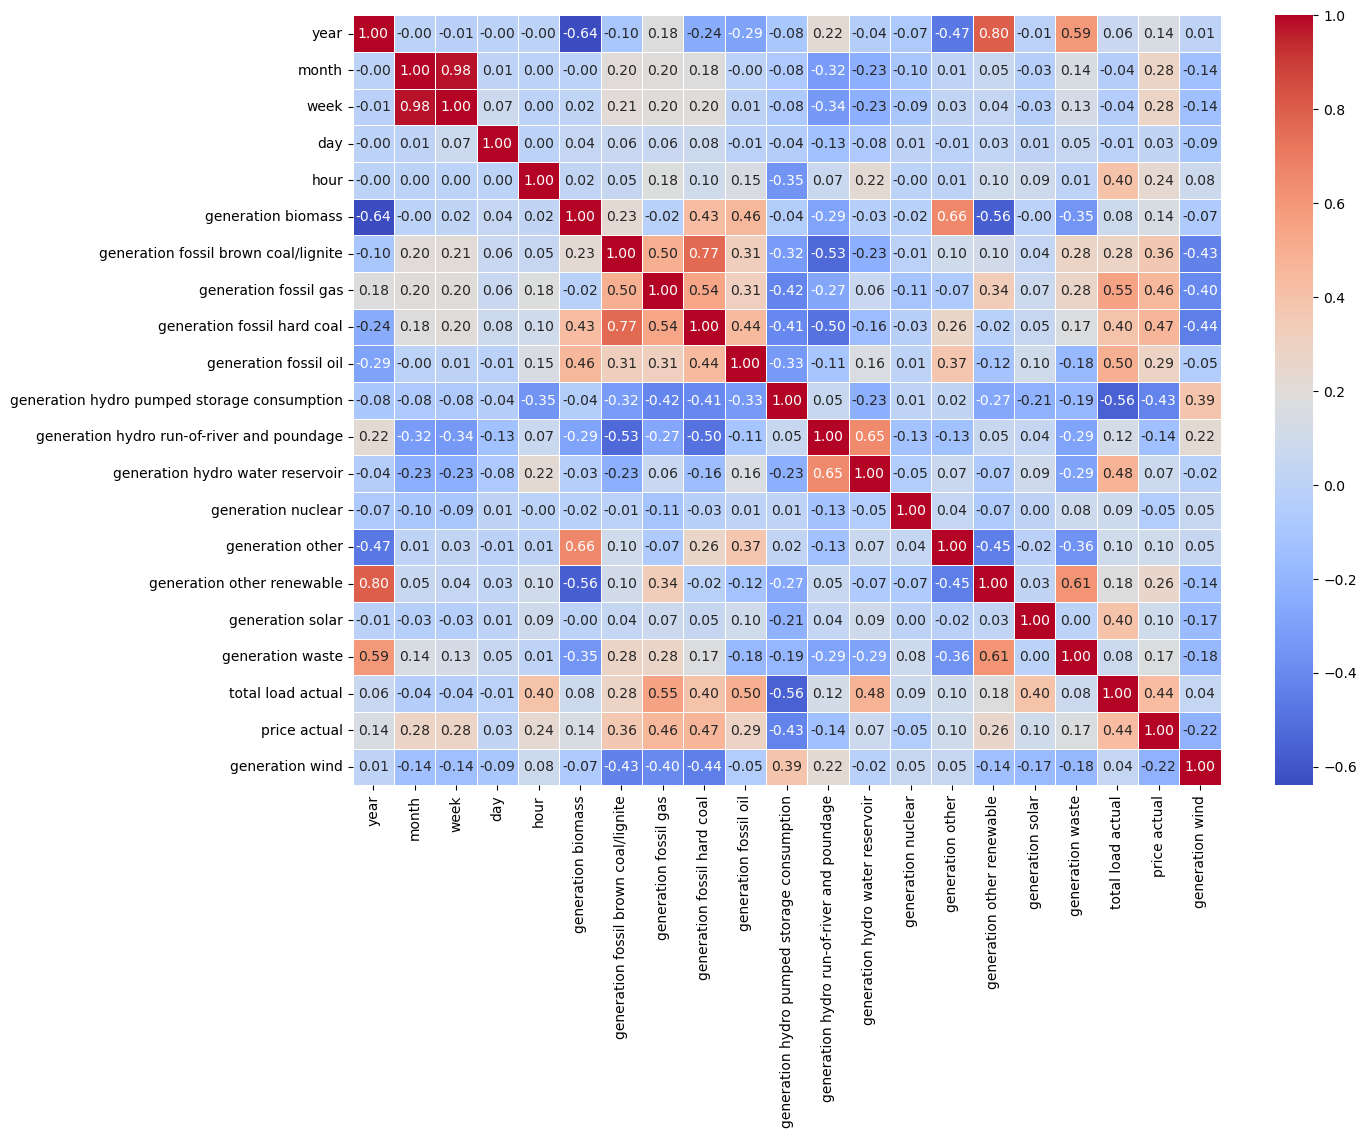

In [68]:
# Selecting all numerical columns
numerical_columns = ['year', 'month', 'week', 'day', 'hour','generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual', 'generation wind']

# Create a correlation matrix
correlation_matrix = df_eda[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [69]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35018 entries, 0 to 178391
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         35018 non-null  object 
 1   year                                         35018 non-null  int32  
 2   month                                        35018 non-null  int32  
 3   week                                         35018 non-null  UInt32 
 4   day                                          35018 non-null  int32  
 5   hour                                         35018 non-null  int32  
 6   generation biomass                           35018 non-null  float64
 7   generation fossil brown coal/lignite         35018 non-null  float64
 8   generation fossil gas                        35018 non-null  float64
 9   generation fossil hard coal                  35018 non-null  float64
 10  ge

# Feature Engineering

In [70]:
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [71]:
# List of generation columns
generation_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                      'generation fossil hard coal', 'generation fossil oil',
                      'generation hydro pumped storage consumption',
                      'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                      'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                      'generation waste', 'generation wind']

# Add a new column 'total load generated' by summing up all generation columns
df_eda['total load generated'] = df_eda[generation_columns].sum(axis=1)

# Display the DataFrame with the new column
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,28251.0
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,27818.0
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear,26796.0
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear,25223.0
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear,24620.0


In [72]:
# Create a new column 'demand_supply_difference'
df_eda['demand_supply_difference'] = df_eda['total load generated'] - df_eda['total load actual']

In [73]:
df_eda.head(3)

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated,demand_supply_difference
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,28251.0,2866.0
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,27818.0,3436.0
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear,26796.0,4062.0


In [74]:
df_eda[['date', 'hour', 'demand_supply_difference']].head()

,date,hour,demand_supply_difference
0,2014-12-31,23,2866.0
5,2015-01-01,0,3436.0
10,2015-01-01,1,4062.0
15,2015-01-01,2,3937.0
20,2015-01-01,3,4356.0


In [75]:
df_eda.tail()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated,demand_supply_difference
178371,2018-12-31,2018,12,1,31,18,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02,285.15,286.15,1028,62,2,0,clear,26415.0,-4238.0
178376,2018-12-31,2018,12,1,31,19,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16,282.15,284.15,1029,71,1,0,clear,25213.0,-4522.0
178381,2018-12-31,2018,12,1,31,20,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30,281.15,282.15,1029,81,3,0,clear,23987.0,-4084.0
178386,2018-12-31,2018,12,1,31,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,69.89,279.15,281.15,1029,81,2,0,clear,22748.0,-3053.0
178391,2018-12-31,2018,12,1,31,22,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,69.88,278.15,280.15,1029,75,2,0,clear,22605.0,-1850.0


In [76]:
df_eda['shifted_demand_supply'] = df_eda['demand_supply_difference'].shift(-1)

In [77]:
df_eda.tail(2)

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated,demand_supply_difference,shifted_demand_supply
178386,2018-12-31,2018,12,1,31,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,69.89,279.15,281.15,1029,81,2,0,clear,22748.0,-3053.0,-1850.0
178391,2018-12-31,2018,12,1,31,22,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,69.88,278.15,280.15,1029,75,2,0,clear,22605.0,-1850.0,NaN


In [79]:
df_eda[['date', 'hour', 'shifted_demand_supply']].head()

,date,hour,shifted_demand_supply
0,2014-12-31,23,3436.0
5,2015-01-01,0,4062.0
10,2015-01-01,1,3937.0
15,2015-01-01,2,4356.0
20,2015-01-01,3,4326.0


In [80]:
df_eda[['date', 'hour', 'shifted_demand_supply']].tail()

,date,hour,shifted_demand_supply
178366,2018-12-31,17,-4238.0
178371,2018-12-31,18,-4522.0
178376,2018-12-31,19,-4084.0
178381,2018-12-31,20,-3053.0
178386,2018-12-31,21,-1850.0


In [81]:
# Assuming you want to remove the last row since while building model it will cause issue and error
df_eda = df_eda.drop(df_eda.index[-1])

In [82]:
df_eda.shape

(35016, 32)

# Model Building

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge

In [84]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

In [85]:
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated,demand_supply_difference,shifted_demand_supply
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,28251.0,2866.0,3436.0
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,27818.0,3436.0,4062.0
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear,26796.0,4062.0,3937.0
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear,25223.0,3937.0,4356.0
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear,24620.0,4356.0,4326.0


In [86]:
# Assuming df_eda is your DataFrame
X = df_eda[['month','week','day','hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'generation wind','temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all', 'weather_main','total load actual','price actual']]

y = df_eda["shifted_demand_supply"]

In [87]:
# Split the data BEFORE fitting the preprocessor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify feature types from training data
num_features = X_train.select_dtypes(exclude="object").columns
cat_features = X_train.select_dtypes(include="object").columns

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown="ignore")  # helps with unseen categories

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

# Fit the preprocessor on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('OneHotEncoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['weather_main'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'total load actual',
       'price actual'],
      dtype='object'))])

In [88]:
import cloudpickle
with open("preprocessor.joblib", "wb") as f:
    cloudpickle.dump(preprocessor, f)

In [89]:
# Transform the datasets
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# check shapes
print(X_train_transformed.shape, X_test_transformed.shape)

(28012, 29) (7004, 29)


In [90]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [95]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Train MAE', 'Train R2', 'Test RMSE', 'Test MAE', 'Test R2'])

# Dictionary to store predictions for each model
model_predictions = {}

# Loop through models
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)  # Fit model
    
    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # Store test predictions and actuals
    model_predictions[model_name] = {
        'y_test': y_test,             # same for all models
        'y_pred': y_test_pred         # model-specific predictions
    }
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Create a new row as a DataFrame and use pd.concat()
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Train RMSE': model_train_rmse,
        'Train MAE': model_train_mae,
        'Train R2': model_train_r2,
        'Test RMSE': model_test_rmse,
        'Test MAE': model_test_mae,
        'Test R2': model_test_r2
    }])

    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Sort and display results
sorted_results = results_df.sort_values(by='Test RMSE', ascending=True)
print(sorted_results.reset_index(drop=True))


C:\Users\aeccs\AppData\Local\Temp\ipykernel_3632\1794484878.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


                     Model   Train RMSE    Train MAE  Train R2    Test RMSE  \
0             XGBRegressor   508.557891   381.358111  0.961087   768.471273   
1        Linear Regression   922.827077   629.351599  0.871870   898.517528   
2                    Ridge   922.821332   629.445321  0.871871   898.606708   
3                    Lasso   922.971166   629.951973  0.871830   899.276666   
4  Random Forest Regressor   349.159636   246.622273  0.981657   906.075203   
5    K-Neighbors Regressor   891.249207   618.044231  0.880489  1122.489558   
6            Decision Tree     0.000000     0.000000  1.000000  1395.978408   
7       AdaBoost Regressor  1671.539403  1355.330814  0.579618  1716.340609   

      Test MAE   Test R2  
0   566.380545  0.910369  
1   635.463235  0.877466  
2   635.626674  0.877442  
3   636.299256  0.877259  
4   652.151890  0.875396  
5   797.314078  0.808765  
6   964.569817  0.704225  
7  1357.078644  0.552894  


## MODEL EVALUATION

In [98]:
xgb_results = model_predictions['XGBRegressor']
y_test_xgb = xgb_results['y_test']
y_pred_xgb = xgb_results['y_pred']

# Evaluate the model
y_diff = y_test_xgb - y_pred_xgb

# Calculate MAE for positive and negative values separately
positive_mae = mean_absolute_error(y_test_xgb[y_diff >= 0], y_pred_xgb[y_diff >= 0])
negative_mae = mean_absolute_error(y_test_xgb[y_diff < 0], y_pred_xgb[y_diff < 0])

# Calculate overall MAE and R-squared
overall_mae = mean_absolute_error(y_test_xgb, y_pred_xgb)
r2 = r2_score(y_test_xgb, y_pred_xgb)

# Print the results
print(f"MAE for positive values: {positive_mae}")
print(f"MAE for negative values: {negative_mae}")
print(f"Overall MAE: {overall_mae}")
print(f"R-squared (R2): {r2}")

MAE for positive values: 561.513076247299
MAE for negative values: 571.143513995308
Overall MAE: 566.3805447835571
R-squared (R2): 0.9103689127638577


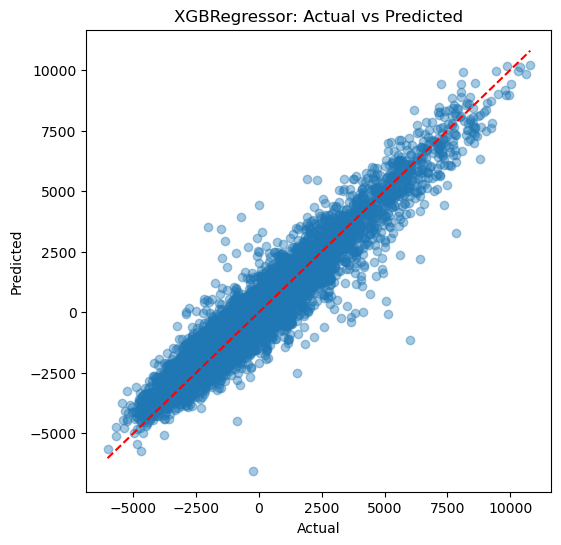

In [100]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_xgb, y_pred_xgb, alpha=0.4)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBRegressor: Actual vs Predicted")
plt.show()

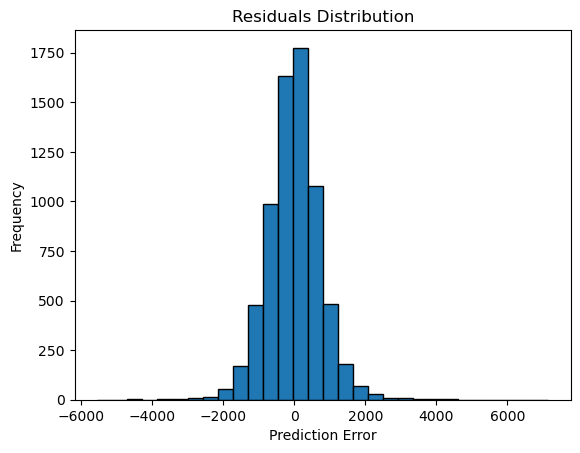

In [103]:
residuals = y_test_xgb - y_pred_xgb
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [102]:
pred_df=pd.DataFrame({'Actual Value':y_test_xgb,'Predicted Value':y_pred_xgb,'Difference':y_test_xgb-y_pred_xgb})
pred_df

,Actual Value,Predicted Value,Difference
147479,-1676.0,-1775.906494,99.906494
99190,2534.0,4679.292480,-2145.292480
85833,-1624.0,-1907.215576,283.215576
98701,-3828.0,-2666.895020,-1161.104980
79163,-2127.0,-1997.515381,-129.484619
...,...,...,...
72165,-2517.0,-2385.342041,-131.657959
133189,1282.0,-464.944672,1746.944672
75973,-1314.0,-1971.521851,657.521851
171166,6280.0,4986.992188,1293.007812


In [107]:
pred_df['Error Type'] = pred_df['Difference'].apply(
    lambda x: 'Underprediction' if x > 0 else 'Overprediction'
)

In [108]:
pred_df['% Error'] = ((pred_df['Difference']) / pred_df['Actual Value'].replace(0, 1)) * 100
pred_df['% Error'] = pred_df['% Error'].round(2)


In [109]:
pred_df_sorted = pred_df.reindex(pred_df['Difference'].abs().sort_values(ascending=False).index)

In [110]:
print(pred_df_sorted.head(10))

        Actual Value  Predicted Value   Difference       Error Type   % Error
170777        6005.0     -1149.563354  7154.563354  Underprediction    119.14
167005        -258.0     -6547.652344  6289.652344  Underprediction  -2437.85
62678        -2014.0      3534.631836 -5548.631836   Overprediction    275.50
171025        5154.0       -90.743713  5244.743713  Underprediction    101.76
82205        -1531.0      3420.817139 -4951.817139   Overprediction    323.44
81218         -708.0      3936.597656 -4644.597656   Overprediction    656.02
115           5068.0       481.889404  4586.110596  Underprediction     90.49
55128         7830.0      3283.384033  4546.615967  Underprediction     58.07
111140          17.0      4434.802734 -4417.802734   Overprediction -25987.07
41533        -1360.0      2958.860596 -4318.860596   Overprediction    317.56


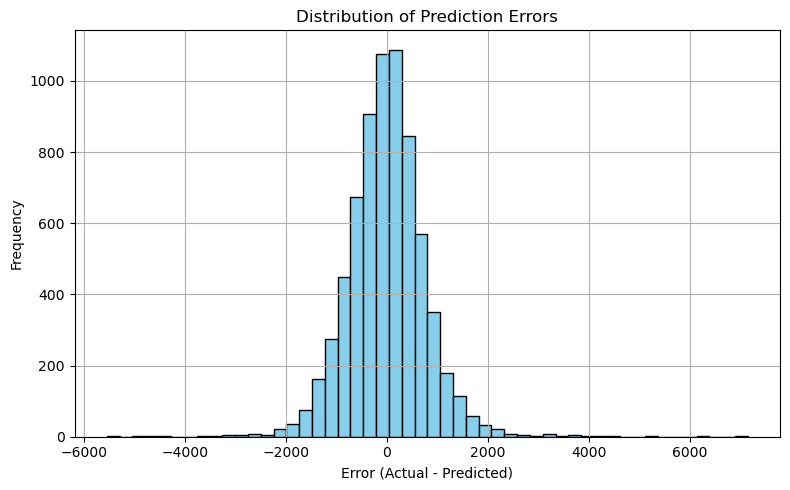

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(pred_df['Difference'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
import joblib
joblib.dump(models["XGBRegressor"], "xgb_model.pkl")

['xgb_model.pkl']

In [115]:
import pickle
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)